In [49]:
import numpy as np
import matplotlib.pyplot as plt

##### Q.1.Write python code from scratch for simple Linear Regression problem, the following training data are given. 
`
X = [2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6] 
Y = [5.1, 6.1, 6.9, 7.8, 9.2, 9.9, 11.5, 12, 12.8] `

The model Y as a linear function of X 
1. Use batch gradient descent learning algorithm to learn model parameters for α = 0.01 choose random values of weights and bias and epochs=1000. Use MSE as loss function with an appropriate convergence criterion. 
2. Plot cost function (J) for the learning duration 
3. plot the regression line 
4. repeat (2) to (3) for stochastic gradient descent and Adam optimization algorithm
5. Plot comparative loss curve 


In [50]:
## Defining Neuron

class Neuron:
    def __init__(self, rate=0.01 , Weight=np.random.rand(),Bias = np.random.rand()):
        self.weight = Weight
        self.bias = Bias
        self.learning_rate = rate

    def disp_params(self):
        print("Weight = {} , Bias = {}".format(self.weight,self.bias))
    
    def forward_step(self,X):
        out = np.sum(X*self.weight) + self.bias
        return(out)
    
    def batch_gradient_descent_step(self,X_in,y_true):
        y_predicted = [self.forward_step(X_in[i]) for i in range(len(X_in))]
        error = np.mean(np.square(y_true-y_predicted))
        
        gradient = np.sum((y_true-y_predicted)*X_in)*-2 /len(X_in)           
        self.weight = self.weight - self.learning_rate * gradient
            
        gradient = np.sum(y_true-y_predicted)*-2/len(X_in) 
        self.bias = self.bias - self.learning_rate * gradient

    def stochastic_gradient_descent_step(self,X_in,y_true):
        y_predicted = self.forward_step(X_in) 
        error = np.mean(np.square(y_true-y_predicted))
        
        gradient = (y_true-y_predicted)*X_in*-2          
        self.weight = self.weight - self.learning_rate * gradient
        gradient = (y_true-y_predicted)*-2
        self.bias = self.bias - self.learning_rate * gradient



Batch gradient decent

Original Values:
Weight = 0.8590092442090487 , Bias = 0.787955213485089

After gradient descent:
Weight = 1.9938326915458633 , Bias = 1.0578057014478726

Ground Truth: [ 5.1  6.1  6.9  7.8  9.2  9.9 11.5 12.  12.8]
Predicted Values: [ 5.045  6.042  7.039  8.036  9.033 10.03  11.027 12.024 13.021]


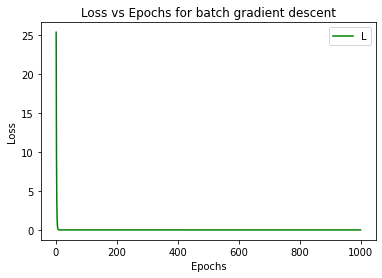

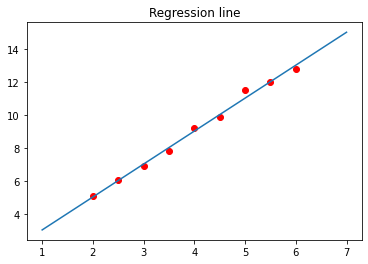

In [51]:
## Perform batch gradient descent 

print("\n"+'\033[1m'+"Batch gradient decent"+'\033[0m'+"\n")

X = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6] )
Y = np.array([5.1, 6.1, 6.9, 7.8, 9.2, 9.9, 11.5, 12, 12.8])
alpha = 0.01
epochs = 1000

#Initialise neuron
A = Neuron(rate = alpha)

#Display initial weight and bias values
print("Original Values:")
A.disp_params()

#Batch gradient_decent
b_loss = [np.inf]    #initialising loss variable as infinity
for _ in range(epochs):
    Prediction = [A.forward_step(i) for i in X ]
    b_loss = b_loss + [np.mean(np.square(Prediction-Y))]    #Save loss for plotting

    A.batch_gradient_descent_step(X,Y) #Perform gradient descent

#Display final weight and bias values
print("\nAfter gradient descent:")
A.disp_params()

#Display predicted values vs ground truth
print("\nGround Truth:",Y)
print("Predicted Values:",np.round(Prediction,3))

#Plot loss vs Iteration graph
plt.plot(b_loss,'g')
plt.legend("Loss")
plt.title("Loss vs Epochs for batch gradient descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#plotting regression line
X_line=np.linspace(1,7,100)
Y_line = [(i* A.weight + A.bias) for i in X_line]
plt.figure()
plt.plot(X_line,Y_line)
plt.scatter(X,Y,color = 'r')
plt.title("Regression line")
plt.show()


Stochastic gradient decent

Weight = 0.8590092442090487 , Bias = 0.787955213485089

After gradient descent:
Weight = 1.942082699144758 , Bias = 1.223580110665697

Ground Truth: [ 5.1  6.1  6.9  7.8  9.2  9.9 11.5 12.  12.8]
Predicted Values: [ 5.105  6.075  7.046  8.016  8.986  9.957 10.927 11.898 12.868]


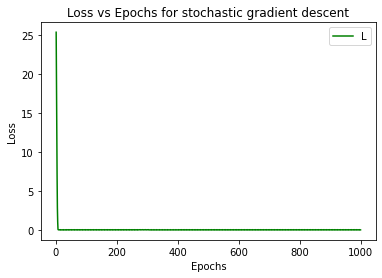

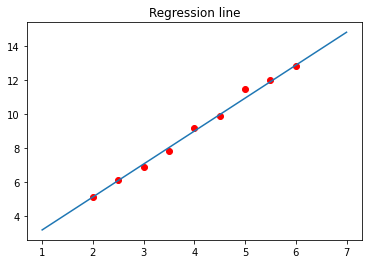

In [52]:
## Perform stochastic gradient descent 

print("\n"+'\033[1m'+"Stochastic gradient decent"+'\033[0m'+"\n")

X = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6] )
Y = np.array([5.1, 6.1, 6.9, 7.8, 9.2, 9.9, 11.5, 12, 12.8])
alpha = 0.01
epochs = 1000

#Initialise neuron
A = Neuron(rate = alpha)

#gradient_decent
A.disp_params()
    
s_loss = [np.inf]
pos=0
for _ in range(epochs):
    pos=pos+1
    Prediction = [A.forward_step(i) for i in X ]
    s_loss = s_loss + [np.mean(np.square(Prediction-Y))]    #Save loss for plotting
    A.stochastic_gradient_descent_step(X[pos%len(X)],Y[pos%len(X)]) #Perform gradient descent

#Display final weight and bias values
print("\nAfter gradient descent:")
A.disp_params()

#Display predicted values vs ground truth
print("\nGround Truth:",Y)
print("Predicted Values:",np.round(Prediction,3))

#Plot loss vs Iteration graph
plt.plot(s_loss,'g')
plt.legend("Loss")
plt.title("Loss vs Epochs for stochastic gradient descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#plotting regression line
X_line=np.linspace(1,7,100)
Y_line = [(i* A.weight + A.bias) for i in X_line]
plt.figure()
plt.plot(X_line,Y_line)
plt.scatter(X,Y,color = 'r')
plt.title("Regression line")
plt.show()

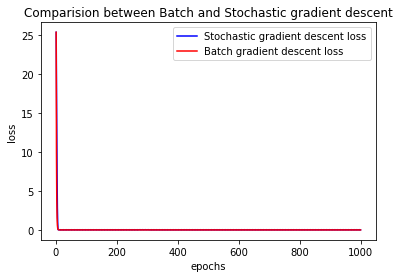

In [53]:
## Compare stochastic and batch gradient descent losses

plt.figure()
plt.title("Comparision between Batch and Stochastic gradient descent")
plt.plot(s_loss,'b',label = "Stochastic gradient descent loss")
plt.plot(b_loss,'r',label="Batch gradient descent loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

##### Q.2. The neural network shown in Fig.1 has the following hyper parameters and input: Choose random weights and bias of the neuron and learning rate =0.01 and inputs to the neuron and target 
values are as follows.

|X1 |X2 |Y(target) |
|---|---|---|
|4 |1 |2 |
|2 |8 |-14| 
|1 |0 |1 |
|3 |2 |-1 |
|1 |4 |-7 |
|6 |7 |-8 |

1. Write a python code for predicted the output of neural network for given set of inputs using Stochastic Gradient Descent algorithm for the loss functions: 
    1. Mean Square Error 
    2. Squared Epsilon Hinge Loss
2. Plot comparative loss curve 
3. repeat (1) and Adam optimization algorithm

In [54]:
class Neuron_2:
    def __init__(self, rate=0.01 , Weights=np.random.rand(2),Bias = np.random.rand(),loss="Mean Square Error",epsilon = 10**-8, alpha =0.001, beta1 = 0.9, beta2=0.999 ):
        self.weights = Weights
        self.bias = Bias
        self.learning_rate = rate
        self.loss = loss
        self.epsilon = epsilon
        
    def disp_params(self):
        print("Weights = {} , Bias = {}".format(self.weights,self.bias))
    
    def forward_step(self,X1,X2):
        out = X1*self.weights[0] +X2*self.weights[1] + self.bias
        return(out)
    
    def Calculate_loss(self,X1,X2,y_true):
        y_predicted = self.forward_step(X1,X2)
        if(self.loss == "Mean Square Error"):
            loss = np.mean(np.square(y_true-y_predicted))
        elif(self.loss == "Squared Epsilon Hinge Loss"):
            loss = 0.5 * (np.square(y_predicted-y_true) - (self.epsilon**2))
            if(loss < 0): loss = 0
        return loss
        
    def stochastic_gradient_descent(self,X1,X2,Y):
        
        y_predicted = self.forward_step(X1,X2) 
        
        if(self.loss == "Mean Square Error"):
            gradient = -2*(Y-y_predicted)
            
        elif(self.loss == "Squared Epsilon Hinge Loss"):
            gradient = (y_predicted-Y)
        
        self.weights[0] = self.weights[0] - self.learning_rate * gradient *X1
        self.weights[1] = self.weights[1] - self.learning_rate * gradient *X2
        self.bias = self.bias - self.learning_rate * gradient          

  #adam optimizer part
    def adam_Optimizer(self, t, w, b, X1, X2, Y):

      y_predicted = self.forward_step(X1,X2)  
      
      if(self.loss == "Mean Square Error"):
        gradient = -2*(Y-y_predicted)
            
      elif(self.loss == "Squared Epsilon Hinge Loss"):
        gradient = (y_predicted-Y) 

      
              

In [55]:
#Define Inputs
X1 = np.array([4,2,1,3,1,6])
X2 = np.array([1,8,0,2,4,7])
Y = np.array([2,-14,1,-1,-7,-8])
rate = 0.01
epsilon = 0.2

Gradient Descent using: Squared Epsilon Hinge Loss
Weights = [0.95917385 0.29299515] , Bias = 0.7195607571330122

After gradient descent:
Weights = [ 0.99335052 -2.00295444] , Bias = 0.03676173900748099

Ground Truth: [  2 -14   1  -1  -7  -8]
Predicted Values: [  2.009 -13.997   1.031  -0.987  -6.98   -8.02 ]


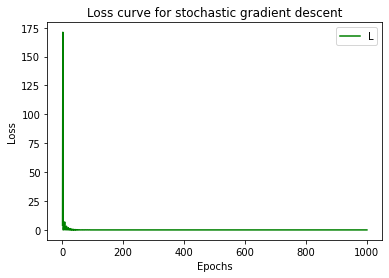

In [56]:
print("Gradient Descent using: Squared Epsilon Hinge Loss")
A = Neuron_2(rate,loss="Squared Epsilon Hinge Loss",epsilon = epsilon)

#gradient_decent
A.disp_params()
    
loss = [np.inf]
for pos in range(epochs):
    Prediction = [A.forward_step(i,j) for i,j in zip(X1,X2) ]
    loss = loss + [A.Calculate_loss(X1[pos%len(X1)],X2[pos%len(X1)],Y[pos%len(X1)])]    #Save loss for plotting
    A.stochastic_gradient_descent(X1 = X1[pos%len(X1)],X2 = X2[pos%len(X1)],Y = Y[pos%len(X1)]) #Perform gradient descent
#Display final weight and bias values
print("\nAfter gradient descent:")
A.disp_params()

#Display predicted values vs ground truth
print("\nGround Truth:",Y)
print("Predicted Values:",np.round(Prediction,3))

#Plot loss vs Iteration graph
plt.plot(loss,'g')
plt.legend("Loss")
plt.title("Loss curve for stochastic gradient descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Gradient Descent using: Mean Square Error
Weights = [ 0.99335052 -2.00295444] , Bias = 0.7195607571330122

After gradient descent:
Weights = [ 0.99972106 -2.00022453] , Bias = 0.0016112627024669258

Ground Truth: [  2 -14   1  -1  -7  -8]
Predicted Values: [  2.    -14.001   1.001  -1.     -6.999  -8.001]


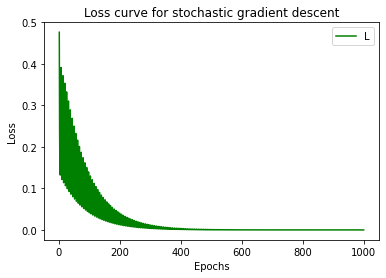

In [57]:
print("Gradient Descent using: Mean Square Error")
A = Neuron_2(rate)

#gradient_decent
A.disp_params()
    
loss = [np.inf]

for pos in range(epochs):
    Prediction = [A.forward_step(i,j) for i,j in zip(X1,X2) ]
    loss = loss + [A.Calculate_loss(X1,X2,Y)]    #Save loss for plotting
    A.stochastic_gradient_descent(X1 = X1[pos%len(X1)],X2 = X2[pos%len(X1)],Y = Y[pos%len(X1)]) #Perform gradient descent

#Display final weight and bias values
print("\nAfter gradient descent:")
A.disp_params()

#Display predicted values vs ground truth
print("\nGround Truth:",Y)
print("Predicted Values:",np.round(Prediction,3))

#Plot loss vs Iteration graph
plt.plot(loss,'g')
plt.legend("Loss")
plt.title("Loss curve for stochastic gradient descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [58]:
# Insert Adam optimisation part here!!!!!

##### Q3. A group of 20 students studied 0 to 6 hours for the exam. Some passed and others failed. Results are given below 

| Student | Hours studied - x | Result (0 – fail, 1 – pass) - y | 
| --- | --- | --- | 
| 1 | 0.5 | 0 | 
| 2 | 0.75 | 0 | 
| 3 | 1.00 | 0 | 
| 4 | 1.25 | 0 | 
| 5 | 1.50 | 0 | 
| 6 | 1.75 | 0 | 
| 7 | 1.75 | 1 | 
| 8 | 2.00 | 0 | 
| 9 | 2.25 | 1 | 
| 10 | 2.50 | 0 | 
| 11 | 2.75 | 1 | 
| 12 | 3.00 | 0 | 
| 13 | 3.25 | 1 | 
| 14 | 3.50 | 0 | 
| 15 | 4.00 | 1 | 
| 16 | 4.25 | 1 | 
| 17 | 4.50 | 1 | 
| 18 | 4.75 | 1 | 
| 19 | 5.00 | 1 | 
| 20 | 5.50 | 1 |

- (a). Write python code for scratch to build neural network model to determine the optimal linear 
hypothesis using linear regression to predict if a student passes or not based on the number hours 
studied with the use for stochastic gradient descent and Adam optimization algorithm with model 
parameters for α = 0.01 choose random values of weights and bias and epochs=10000. Use 
appropriate regression loss function. 
- (b). 
    - (i).Write python code from scratch to determine the optimal logistic hypothesis using logistic regression to predict if a student passes or not based on the number hours studied with the use for stochastic gradient descent with model parameters for α = 0.01 choose random values of weights and bias and epochs=40000; Loss function: Binary Cross Entropy (BCE), Threshold value=0.5 
        - (a) plot the cost function vs epoch 
        - (b) Predict pass or failed result of your designed model on random study hours enter by you. 
    - (ii) Repeat part (i) analysis with Dice Loss function. 
    - (iii)Repeat part (i) analysis with Adam optimization algorithm. 


In [59]:
X = [0.5 ,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00, 5.50]
Y = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]
alpha = 0.01
epochs = 10000

Weight = 0.8590092442090487 , Bias = 0.787955213485089

After gradient descent:
Weight = 0.2128366433480237 , Bias = -0.11495397488463911

Ground Truth: [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
Predicted Values: 1.148


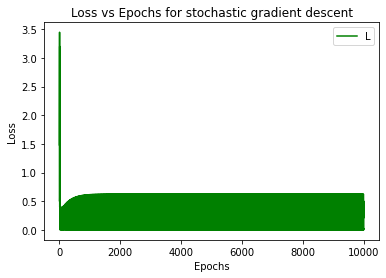

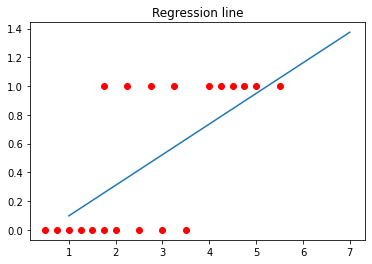

In [60]:
#Initialise neuron
A = Neuron(rate = alpha)

#gradient_decent
A.disp_params()
    
s_loss = [np.inf]
for pos in range(epochs):
    Prediction = A.forward_step(X[pos%len(X)])
    s_loss = s_loss + [np.mean(np.square(Prediction-Y[pos%len(X)]))]    #Save loss for plotting
    A.stochastic_gradient_descent_step(X[pos%len(X)],Y[pos%len(X)]) #Perform gradient descent

#Display final weight and bias values
print("\nAfter gradient descent:")
A.disp_params()

#Display predicted values vs ground truth
print("\nGround Truth:",Y)
print("Predicted Values:",np.round(Prediction,3))

#Plot loss vs Iteration graph
plt.plot(s_loss,'g')
plt.legend("Loss")
plt.title("Loss vs Epochs for stochastic gradient descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#plotting regression line
X_line=np.linspace(1,7,100)
Y_line = [(i* A.weight + A.bias) for i in X_line]
plt.figure()
plt.plot(X_line,Y_line)
plt.scatter(X,Y,color = 'r')
plt.title("Regression line")
plt.show()

In [61]:
#other functions
# Loss Function BCE
def loss_BCE(y, y_hat):
  # y -> truth
  # y_hat -> prediction/hypothesis
  loss = -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
  return loss

def Dice_Loss(y_hat,y):
    total = len(y_hat)
    TP = np.logical_and(y,np.round(y_hat))
    TN = np.logical_and(1 - y, 1 - np.round(y_hat))
    DC = (2*np.sum(TP))/(total-np.sum(TN)+np.sum(TP)) # Dice Coefficient
    DL=1-DC                                           # Dice Loss
    return DL 

# Gradients calculation
def gradient(X, y, y_hat):
  # m ->number of training examples
  m = X.shape[0]

  # Gradient w.r.t. weights
  dw = (1/m)*np.dot(X.T, (y_hat-y))

  # Gradient w.r.t. bias
  db = (1/m)*np.sum(y_hat-y)

  return dw, db    

#sigmoid function
def sigmoid(x):
  return 1.0/(1+np.exp(-x))
    


In [62]:
np.round(0.51)

1.0

In [63]:
#(b)(i)
## Defining Neuron
class Neuron_log:
  # class initialization 
    def __init__(self, learn_rate=0.01, weights=np.random.rand(), bias=np.random.rand(), loss="Binary Cross Entropy"):
      #l_rate -> learning rate
      self.l_rate = learn_rate
      self.weights = weights
      self.bias = bias

  # Displaying parameters
    def disp_params(self):
      print("Weight = {} , Bias = {}".format(self.weights,self.bias))

      
  # hypothesis, or forward step
    def forward_step(self, X):
      # X -> Input
      return sigmoid(np.dot(X,self.weights)+self.bias)

  # stochastic gradient step
    def stochastic_gradient_step(self, X, y):
      y_hat = self.forward_step(X)

      #updating weights and bias
      dw, db = gradient(X, y, y_hat)

      self.weights = self.weights - dw*self.l_rate
      self.bias = self.bias - db*self.l_rate
    
  # loss calculation
    def loss(self, y, y_hat):
      if(self.loss == "Binary Cross Entropy"):
        loss = loss_BCE(y, y_hat)
      elif(self.loss == "Dice Loss"):
        ;

In [64]:
# defining inputs
X = np.array([0.5, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
epochs = 40000
alpha = 0.01
threshold_value = 0.5

In [65]:
## Training
#Initialise neuron
B = Neuron_log(learn_rate = alpha)

#Display initial weight and bias values
print("Original Values:")
B.disp_params()

#stochastic gradient_decent
loss = [np.inf]    #initialising loss variable as infinity
for _ in range(epochs):
    y_hat =[B.forward_step(i) for i in X ]
    y_hat=np.array(y_hat)
    loss = loss + [loss_BCE(y, y_hat)]    #Save loss for plotting

    B.stochastic_gradient_step(X,y) #Perform gradient descent

#Display final weight and bias values
print("\nAfter gradient descent:")
B.disp_params()

#Display predicted values vs ground truth
print("\nGround Truth:",y)
Prediction = [1 if y_hat[i]>=threshold_value else 0 for i in range(y.shape[0])]

print("Output values:",y_hat)
print("Predicted Values:",Prediction)

Original Values:
Weight = 0.9718869821339801 , Bias = 0.5737978361604621

After gradient descent:
Weight = 1.5025364530203924 , Bias = -4.071482982054606

Ground Truth: [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]
Output values: [0.0348842  0.0499933  0.07116395 0.10035269 0.13971275 0.19122905
 0.19122905 0.25608644 0.33386053 0.4218602  0.51511847 0.60733563
 0.69248451 0.76627474 0.87420513 0.91005417 0.93642985 0.95544976
 0.96896758 0.98511591]
Predicted Values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


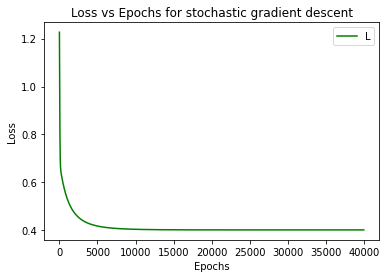

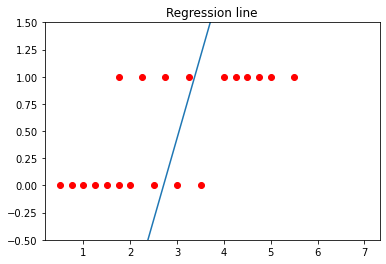

In [66]:
#Plot loss vs Iteration graph
plt.plot(loss,'g')
plt.legend("Loss")
plt.title("Loss vs Epochs for stochastic gradient descent")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#plotting regression line
X_line=np.linspace(1,7,100)
Y_line = [(i* B.weights + B.bias) for i in X_line]
plt.figure()
plt.plot(X_line,Y_line)
plt.scatter(X,y,color = 'r')
plt.title("Regression line")
plt.ylim([-0.5,1.5])
plt.show()

In [67]:
#predicting for custom values
test = np.array([1.00, 3.75, 7])
y_test = test* B.weights + B.bias
y_probability = sigmoid(y_test)
predict = [1 if y_probability[i]>=threshold_value else 0 for i in range(y_probability.shape[0])]
display(predict)

[0, 1, 1]

##### Q.4. Build a model to recognize different handwritten digits from MNIST dataset by using multinomial logistic regression.Use of Adam optimization algorithm to learn model with parameters for α = 0.01, epoch = 40000 and random parameters of the model and Loss function: Softmax loss function.
- (a) Plot the cost function vs epoch 
- (b) Predict the digit of your designed model on random test data enter by you 
- (c) print confusion matrix 
- (d) calculate classification metrics such as precision,recall, f1-score and accuracy

##### Q.5. Build a model to discriminate the red, green and blue points in 2-dimensional space shown below: 

The input data and target are as follows: 

`
X=np.array([[-0.1, 1.4], 
[-0.5,0.2], 
 [1.3,0.9], 
 [-0.6,0.4], 
 [-1.6,0.2], 
 [0.2,0.2], 
 [-0.3,-0.4], 
 [0.7,-0.8], 
 [1.1,-1.5], 
 [-1.0,0.9], 
 [-0.5,1.5], 
 [-1.3,-0.4], 
 [-1.4,-1.2], 
 [-0.9,-0.7], 
 [0.4,-1.3], 
 [-0.4,0.6], 
 [0.3,-0.5], 
 [-1.6,-0.7], 
 [-0.5,-1.4], 
 [-1.0,-1.4]]) 
y=np.array ([0,0,1,0,2,1,1,1,1,0,0,2,2,2,1,0,1,2,2,2]); `

Here, 
0=red, 1=green and 2= blue dots 
In other words, given a point in 2-dimensions, x=(x1,x2), predict output either red, green or blue by 
using multinomial logistic regression. 
- (a) 
    - (i) Compare predicted results with ground truth using bar chat plot 
    - (ii) plot loss curve 
    - (iii) print confusion matrix 
    - (iv) calculate classification metrics such as precision, recall, f1-score and accuracy 
    - (v) Visualize classified data by Scatter plot. Use of gradient descent learning algorithm to learn model with parameters for α = 0.01, Softmax loss function and random parameters of the model.
- (b)repeat part (a) Use Stochastic gradient descent algorithm to learn model 
- (c) repeat part (a) with use of Adam Optimization algorithm to learn model